# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [7]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print("xs:", xs,'\n')
print("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print("xs values:", xs.values, type(xs.values),'\n')
print(xs['f'], xs.f, xs.h, '\n')
print(xs[['d', 'f', 'h']], '\n') # subset of a series is a series
print(type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [ ]:
# Extracting elements and operations: same as numpy array
print(xs[:3],'\n')
print(xs[7:], '\n')
print(xs[::3], '\n')
print(xs[xs>3], '\n')
print(np.exp(xs), '\n')
print(np.mean(xs), np.std(xs), '\n')

In [10]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
d = {'b': 1, 'a': 'cat', 'c': [2, 3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [9]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.233667
b   -0.876373
c   -0.566678
d    0.006427
e   -0.520290
dtype: float64
a         NaN
b   -1.752746
c   -1.133355
d    0.012854
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [12]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022, 11, 30, 10, 45, 10, 15)
print(date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print(date)

days = pd.date_range(date, periods=7, freq='D')
print(days)

seconds = pd.date_range(date, periods=3600, freq='s')
print(seconds)

2022-11-30
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [14]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print(type(ts))
print(ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print(ts)
print(ts.value)

1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [13]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print(tseries[0:4], '\n')
print(tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time

2022-11-30 10:45:00     9.426220
2022-12-01 10:45:00     9.001841
2022-12-02 10:45:00    10.463141
2022-12-03 10:45:00    10.028527
Freq: D, dtype: float64 

2022-11-30 10:45:00    9.426220
2022-12-01 10:45:00    9.001841
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [15]:
entries = 10
dates = pd.date_range('11/30/2022 10:45:00', freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries, 4), index=dates,
                  columns=['A', 'B', 'C', 'D'])
df


,A,B,C,D
2022-11-30 10:45:00,-0.448494,1.575874,0.343526,0.264465
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,1.923417
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,0.079865
2022-11-30 13:45:00,0.204307,0.157408,0.914261,-1.074437
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,0.464455
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,-0.286551
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,-1.336282
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,0.839587
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,0.366836
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,0.560731


or by means of a dictionary:


In [19]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test", "train", "test", "train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [20]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,-0.448494,1.575874,0.343526,0.264465
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,1.923417


In [21]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,-1.336282
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,0.839587
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,0.366836
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,0.560731


In [22]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [24]:
df.values

array([[-0.44849389,  1.57587379,  0.34352557,  0.26446503],
       [-0.69801556,  1.46563459, -0.29608799,  1.92341711],
       [ 0.3070742 , -0.46140847,  1.21041591,  0.0798654 ],
       [ 0.2043073 ,  0.15740809,  0.91426068, -1.07443726],
       [ 0.01854322,  0.95305429, -0.49481468,  0.46445478],
       [-0.39177298,  1.50696816,  0.39664133, -0.28655122],
       [ 2.09528598,  0.66963505, -1.55488996, -1.33628166],
       [ 0.54935945,  0.3991998 , -1.04801747,  0.83958678],
       [-1.19067912,  1.09343398,  0.12891067,  0.36683635],
       [ 1.03071426,  0.61216976, -0.28947966,  0.56073149]])

In [25]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.147632,0.797197,-0.068954,0.180209
std,0.938817,0.655854,0.848379,0.933505
min,-1.190679,-0.461408,-1.554890,-1.336282
25%,-0.434314,0.452442,-0.445133,-0.194947
50%,0.111425,0.811345,-0.080284,0.315651
75%,0.488788,1.372584,0.383362,0.536662
max,2.095286,1.575874,1.210416,1.923417


In [26]:
df.T

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,-0.448494,-0.698016,0.307074,0.204307,0.018543,-0.391773,2.095286,0.549359,-1.190679,1.030714
B,1.575874,1.465635,-0.461408,0.157408,0.953054,1.506968,0.669635,0.399200,1.093434,0.612170
C,0.343526,-0.296088,1.210416,0.914261,-0.494815,0.396641,-1.554890,-1.048017,0.128911,-0.289480
D,0.264465,1.923417,0.079865,-1.074437,0.464455,-0.286551,-1.336282,0.839587,0.366836,0.560731


In [28]:
df.sort_index(axis=0, ascending=True)

,A,B,C,D
2022-11-30 10:45:00,-0.448494,1.575874,0.343526,0.264465
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,1.923417
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,0.079865
2022-11-30 13:45:00,0.204307,0.157408,0.914261,-1.074437
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,0.464455
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,-0.286551
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,-1.336282
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,0.839587
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,0.366836
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,0.560731


In [31]:
df.sort_values(by="C", ascending=False)

,A,B,C,D
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,0.079865
2022-11-30 13:45:00,0.204307,0.157408,0.914261,-1.074437
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,-0.286551
2022-11-30 10:45:00,-0.448494,1.575874,0.343526,0.264465
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,0.366836
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,0.560731
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,1.923417
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,0.464455
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,0.839587
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,-1.336282


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [32]:
## standard and safe
print(df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print(df.A)

2022-11-30 10:45:00   -0.448494
2022-11-30 11:45:00   -0.698016
2022-11-30 12:45:00    0.307074
2022-11-30 13:45:00    0.204307
2022-11-30 14:45:00    0.018543
2022-11-30 15:45:00   -0.391773
2022-11-30 16:45:00    2.095286
2022-11-30 17:45:00    0.549359
2022-11-30 18:45:00   -1.190679
2022-11-30 19:45:00    1.030714
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00   -0.448494
2022-11-30 11:45:00   -0.698016
2022-11-30 12:45:00    0.307074
2022-11-30 13:45:00    0.204307
2022-11-30 14:45:00    0.018543
2022-11-30 15:45:00   -0.391773
2022-11-30 16:45:00    2.095286
2022-11-30 17:45:00    0.549359
2022-11-30 18:45:00   -1.190679
2022-11-30 19:45:00    1.030714
Freq: H, Name: A, dtype: float64


In [ ]:
# selecting rows by counting
print(df[0:3])

# or by index
print(df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

### Selection by label

In [34]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.448494
B    1.575874
C    0.343526
D    0.264465
Name: 2022-11-30 10:45:00, dtype: float64

In [33]:
# selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]
#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,-0.448494,1.575874
2022-11-30 11:45:00,-0.698016,1.465635
2022-11-30 12:45:00,0.307074,-0.461408
2022-11-30 13:45:00,0.204307,0.157408
2022-11-30 14:45:00,0.018543,0.953054
2022-11-30 15:45:00,-0.391773,1.506968
2022-11-30 16:45:00,2.095286,0.669635
2022-11-30 17:45:00,0.549359,0.399200
2022-11-30 18:45:00,-1.190679,1.093434
2022-11-30 19:45:00,1.030714,0.612170


In [36]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00', ['A', 'B']]

,A,B
2022-11-30 14:45:00,0.018543,0.953054
2022-11-30 15:45:00,-0.391773,1.506968
2022-11-30 16:45:00,2.095286,0.669635


In [37]:
# getting an individual element
print(df.loc[dates[1], 'A'])

# equivalently
print(df.at[dates[1], 'A'])

-0.6980155602638457
-0.6980155602638457


### Selecting by position

In [38]:
# select via the position of the passed integers:
print(df.iloc[3],'\n')

# notation similar to numpy/python
print(df.iloc[3:5, 0:2])

A    0.204307
B    0.157408
C    0.914261
D   -1.074437
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00  0.204307  0.157408
2022-11-30 14:45:00  0.018543  0.953054


In [39]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2022-11-30 11:45:00,-0.698016,-0.296088
2022-11-30 12:45:00,0.307074,1.210416
2022-11-30 14:45:00,0.018543,-0.494815


In [40]:
# slicing rows explicitly
print(df.iloc[1:3, :],'\n')

# slicing columns explicitly
print(df.iloc[:, 1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.698016  1.465635 -0.296088  1.923417
2022-11-30 12:45:00  0.307074 -0.461408  1.210416  0.079865 

                            B         C
2022-11-30 10:45:00  1.575874  0.343526
2022-11-30 11:45:00  1.465635 -0.296088
2022-11-30 12:45:00 -0.461408  1.210416
2022-11-30 13:45:00  0.157408  0.914261
2022-11-30 14:45:00  0.953054 -0.494815
2022-11-30 15:45:00  1.506968  0.396641
2022-11-30 16:45:00  0.669635 -1.554890
2022-11-30 17:45:00  0.399200 -1.048017
2022-11-30 18:45:00  1.093434  0.128911
2022-11-30 19:45:00  0.612170 -0.289480


In [41]:
# selecting an individual element by position
df.iloc[1, 1]
df.iat[1, 1]


1.4656345949930503

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [ ]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

In [42]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df > 0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,NaN,1.575874,0.343526,0.264465
2022-11-30 11:45:00,NaN,1.465635,NaN,1.923417
2022-11-30 12:45:00,0.307074,NaN,1.210416,0.079865
2022-11-30 13:45:00,0.204307,0.157408,0.914261,NaN
2022-11-30 14:45:00,0.018543,0.953054,NaN,0.464455
2022-11-30 15:45:00,NaN,1.506968,0.396641,NaN
2022-11-30 16:45:00,2.095286,0.669635,NaN,NaN
2022-11-30 17:45:00,0.549359,0.399200,NaN,0.839587
2022-11-30 18:45:00,NaN,1.093434,0.128911,0.366836
2022-11-30 19:45:00,1.030714,0.612170,NaN,0.560731


### Setting

Combination of selection and setting of values

In [43]:
# setting values by label (same as by position)
df.at[dates[0], 'A'] = 0

# setting and assigning a numpy array
df.loc[:, 'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df)) * 0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df)) * 2, index=df.index)


/tmp/ipykernel_18783/2901050703.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


In [45]:
def dcos(theta):
    theta = theta * (np.pi / 180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df['E'].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.575874,0.343526,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,5,0.5,2,0.999962
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,5,1.0,4,0.999848
2022-11-30 13:45:00,0.204307,0.157408,0.914261,5,1.5,6,0.999657
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,5,2.0,8,0.999391
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,5,2.5,10,0.999048
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,5,3.0,12,0.998630
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,5,4.0,16,0.997564
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,5,4.5,18,0.996917


In [47]:
# another example of global setting
df2 = df.copy()

df2[df2 > 0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-1.575874,-0.343526,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.698016,-1.465635,-0.296088,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-0.307074,-0.461408,-1.210416,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-0.204307,-0.157408,-0.914261,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-0.018543,-0.953054,-0.494815,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-0.391773,-1.506968,-0.396641,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-2.095286,-0.669635,-1.554890,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-0.549359,-0.399200,-1.048017,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-1.190679,-1.093434,-0.128911,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-1.030714,-0.612170,-0.289480,-5,-4.5,-18,-0.996917


In [48]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.575874,0.343526,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,5,0.5,2,0.999962
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,5,1.0,4,0.999848
2022-11-30 13:45:00,0.204307,0.157408,0.914261,5,1.5,6,0.999657
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,5,2.0,8,0.999391
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,5,2.5,10,0.999048
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,5,3.0,12,0.998630
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,5,4.0,16,0.997564
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [49]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df = df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,1.575874,0.343526,5,0.0,1.000000
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,5,0.5,0.999962
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,5,1.0,0.999848
2022-11-30 13:45:00,0.204307,0.157408,0.914261,5,1.5,0.999657
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,5,2.0,0.999391
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,5,2.5,0.999048
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,5,3.0,0.998630
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,5,3.5,0.998135
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,5,4.0,0.997564
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,5,4.5,0.996917


In [50]:
# Dropping by rows
# safe and always working
df.drop(df.index[[1, 2, 3, 4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.575874,0.343526,5,0.0,0,1.000000
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,5,2.5,10,0.999048
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,5,3.0,12,0.998630
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,5,4.0,16,0.997564
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,5,4.5,18,0.996917


In [54]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.575874,0.343526,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,5,0.5,2,0.999962
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,5,1.0,4,0.999848
2022-11-30 13:45:00,0.204307,0.157408,0.914261,5,1.5,6,0.999657
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,5,2.0,8,0.999391
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,5,2.5,10,0.999048
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,5,3.0,12,0.998630
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,5,4.0,16,0.997564
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,5,4.5,18,0.996917


In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [68]:
df_wNan = df[df < -1]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 11:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 12:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 13:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 14:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 15:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 16:45:00,NaN,NaN,-1.554890,NaN,NaN,NaN,NaN
2022-11-30 17:45:00,NaN,NaN,-1.048017,NaN,NaN,NaN,NaN
2022-11-30 18:45:00,-1.190679,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 19:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [69]:
# Some statistics (mean() just as an example)
# raws
print(df.mean(axis=0),'\n')
# columns
print(df.mean(axis=1),'\n')

A          0.192482
B          0.797197
C         -0.068954
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    1.131343
2022-11-30 11:45:00    1.281642
2022-11-30 12:45:00    1.722276
2022-11-30 13:45:00    2.110805
2022-11-30 14:45:00    2.353739
2022-11-30 15:45:00    2.858698
2022-11-30 16:45:00    3.172666
2022-11-30 17:45:00    3.342668
2022-11-30 18:45:00    3.718461
2022-11-30 19:45:00    4.264332
Freq: H, dtype: float64 



In [70]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.575874,0.343526,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.698016,3.041508,0.047438,10,0.5,2,1.999962
2022-11-30 12:45:00,-0.390941,2.580100,1.257853,15,1.5,6,2.999810
2022-11-30 13:45:00,-0.186634,2.737508,2.172114,20,3.0,12,3.999467
2022-11-30 14:45:00,-0.168091,3.690562,1.677299,25,5.0,20,4.998858
2022-11-30 15:45:00,-0.559864,5.197530,2.073941,30,7.5,30,5.997906
2022-11-30 16:45:00,1.535422,5.867166,0.519051,35,10.5,42,6.996536
2022-11-30 17:45:00,2.084782,6.266365,-0.528967,40,14.0,56,7.994670
2022-11-30 18:45:00,0.894102,7.359799,-0.400056,45,18.0,72,8.992234
2022-11-30 19:45:00,1.924817,7.971969,-0.689536,50,22.5,90,9.989152


In [71]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.575874,0.343526,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.698016,1.465635,-0.296088,5,0.5,2,0.999962
2022-11-30 12:45:00,0.307074,-0.461408,1.210416,5,1.0,4,0.999848
2022-11-30 13:45:00,0.204307,0.157408,0.914261,5,1.5,6,0.999657
2022-11-30 14:45:00,0.018543,0.953054,-0.494815,5,2.0,8,0.999391
2022-11-30 15:45:00,-0.391773,1.506968,0.396641,5,2.5,10,0.999048
2022-11-30 16:45:00,2.095286,0.669635,-1.554890,5,3.0,12,0.998630
2022-11-30 17:45:00,0.549359,0.399200,-1.048017,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.190679,1.093434,0.128911,5,4.0,16,0.997564
2022-11-30 19:45:00,1.030714,0.612170,-0.289480,5,4.5,18,0.996917


In [72]:
df.apply(lambda x: x.max() - x.min())

A           3.285965
B           2.037282
C           2.765306
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [73]:
# syntax is as usual similar to that of numpy arrays
df['A'] + df['B']

2022-11-30 10:45:00    1.575874
2022-11-30 11:45:00    0.767619
2022-11-30 12:45:00   -0.154334
2022-11-30 13:45:00    0.361715
2022-11-30 14:45:00    0.971598
2022-11-30 15:45:00    1.115195
2022-11-30 16:45:00    2.764921
2022-11-30 17:45:00    0.948559
2022-11-30 18:45:00   -0.097245
2022-11-30 19:45:00    1.642884
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [74]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name = "data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [83]:
# the one-liner killing it all
data['timens'] = data['TDC_MEAS'] * 25 / 30 + data['BX_COUNTER'] * 25

In [84]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [ ]:
# the old slooow way
def conversion(data):
    result = []
    for i in range(len(data)): 
        result.append(data.loc[data.index[i], 'TDC_MEAS'] * 25 / 30. + data.loc[data.index[i], 'BX_COUNTER'] * 25)
    return [data.loc[data.index[i], 'TDC_MEAS']]

data['timens'] = conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [85]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-2.083656,1.289221,-1.008752,-0.371049
1,-1.595899,-0.247824,-0.072252,0.662746
2,0.504027,0.118835,0.575249,-0.336740
3,-0.954946,1.939329,0.943487,-1.742422
4,-1.607080,0.343503,0.192364,0.719736
5,-1.349236,-3.037409,0.517673,-0.967125
6,-0.748414,0.123383,0.568091,1.296844
7,1.238920,-0.936450,1.176089,-2.108230
8,0.916474,-1.849127,-0.628728,0.097539
9,-0.649155,2.044888,0.646742,-1.217778


In [86]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -2.083656  1.289221 -1.008752 -0.371049
 1 -1.595899 -0.247824 -0.072252  0.662746
 2  0.504027  0.118835  0.575249 -0.336740,
           0         1         2         3
 3 -0.954946  1.939329  0.943487 -1.742422
 4 -1.607080  0.343503  0.192364  0.719736
 5 -1.349236 -3.037409  0.517673 -0.967125
 6 -0.748414  0.123383  0.568091  1.296844,
           0         1         2         3
 7  1.238920 -0.936450  1.176089 -2.108230
 8  0.916474 -1.849127 -0.628728  0.097539
 9 -0.649155  2.044888  0.646742 -1.217778]

In [87]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-2.083656,1.289221,-1.008752,-0.371049
1,-1.595899,-0.247824,-0.072252,0.662746
2,0.504027,0.118835,0.575249,-0.336740
3,-0.954946,1.939329,0.943487,-1.742422
4,-1.607080,0.343503,0.192364,0.719736
5,-1.349236,-3.037409,0.517673,-0.967125
6,-0.748414,0.123383,0.568091,1.296844
7,1.238920,-0.936450,1.176089,-2.108230
8,0.916474,-1.849127,-0.628728,0.097539
9,-0.649155,2.044888,0.646742,-1.217778


In [88]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

/tmp/ipykernel_18783/3203204840.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf.append(s, ignore_index=True)


,0,1,2,3
0,-2.083656,1.289221,-1.008752,-0.371049
1,-1.595899,-0.247824,-0.072252,0.662746
2,0.504027,0.118835,0.575249,-0.336740
3,-0.954946,1.939329,0.943487,-1.742422
4,-1.607080,0.343503,0.192364,0.719736
5,-1.349236,-3.037409,0.517673,-0.967125
6,-0.748414,0.123383,0.568091,1.296844
7,1.238920,-0.936450,1.176089,-2.108230
8,0.916474,-1.849127,-0.628728,0.097539
9,-0.649155,2.044888,0.646742,-1.217778


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [89]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.196694,0.312097
1,bar,one,-0.153800,0.813673
2,foo,two,-1.134966,-2.386656
3,bar,three,-0.681267,-0.228181
4,foo,two,-0.734393,-0.563488
5,bar,two,-1.878149,1.893918
6,foo,one,-1.140006,0.757136
7,foo,three,0.045465,0.294899


In [94]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

/tmp/ipykernel_18783/2296005771.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby('A').sum()


,C,D
A,,
bar,-2.713216,2.479409
foo,-3.160595,-1.586012


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [95]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.051314
       two       0.526946
baz    one      -0.285719
       two      -0.288555
foo    one       0.300744
       two       0.858274
qux    one       1.325407
       two       1.887509
dtype: float64


In [96]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.153800  0.813673
    three -0.681267 -0.228181
    two   -1.878149  1.893918
foo one   -1.336700  1.069233
    three  0.045465  0.294899
    two   -1.869360 -2.950144

In [97]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.153800
            D    0.813673
     three  C   -0.681267
            D   -0.228181
     two    C   -1.878149
            D    1.893918
foo  one    C   -1.336700
            D    1.069233
     three  C    0.045465
            D    0.294899
     two    C   -1.869360
            D   -2.950144
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot: >

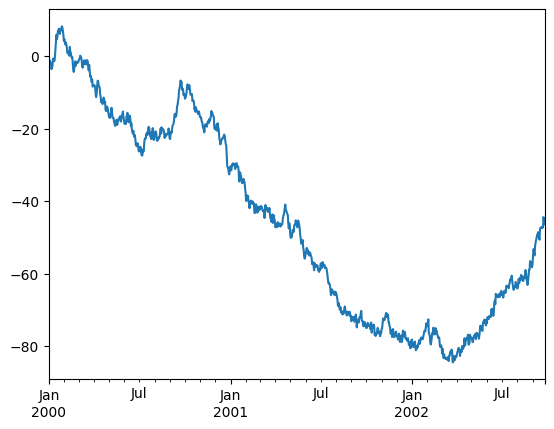

In [98]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

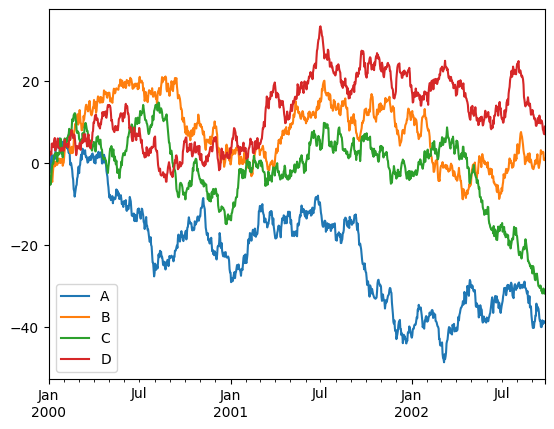

In [99]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')